In [68]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [69]:
nba_df = pd.read_csv("nba_stats.csv")

In [6]:
nba_df.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [8]:
# 9840 rows and 41 columns
nba_df.shape

(9840, 41)

In [9]:
#No nulls. Team, Date, Home, Opponent, WL are object types
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                9840 non-null   int64  
 1   Team                      9840 non-null   object 
 2   Game                      9840 non-null   int64  
 3   Date                      9840 non-null   object 
 4   Home                      9840 non-null   object 
 5   Opponent                  9840 non-null   object 
 6   WINorLOSS                 9840 non-null   object 
 7   TeamPoints                9840 non-null   int64  
 8   OpponentPoints            9840 non-null   int64  
 9   FieldGoals                9840 non-null   int64  
 10  FieldGoalsAttempted       9840 non-null   int64  
 11  FieldGoals.               9840 non-null   float64
 12  X3PointShots              9840 non-null   int64  
 13  X3PointShotsAttempted     9840 non-null   int64  
 14  X3PointS

In [14]:
nba_df.describe()

,Unnamed: 0,Game,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.00000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,11960.157012,41.500000,103.652337,103.652337,38.602439,84.902439,0.455689,9.126829,25.623679,0.354321,...,17.32063,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,18654.867508,23.670804,12.188043,12.188043,5.029992,7.130043,0.054711,3.598084,7.102501,0.097782,...,6.00262,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,1.000000,1.000000,64.000000,64.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,...,1.00000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,2537.750000,21.000000,95.000000,95.000000,35.000000,80.000000,0.418000,7.000000,21.000000,0.290000,...,13.00000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,5141.500000,41.500000,103.000000,103.000000,38.000000,85.000000,0.455000,9.000000,25.000000,0.353000,...,17.00000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,7715.250000,62.000000,112.000000,112.000000,42.000000,89.000000,0.494000,11.000000,30.000000,0.419000,...,21.00000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,82119.000000,82.000000,149.000000,149.000000,58.000000,129.000000,0.684000,25.000000,61.000000,0.750000,...,44.00000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [22]:
def numeric_hists(df, bins=20):
    """
    Function to take in a DataFrame, bins default 20,
    select only numeric dtypes, and
    display histograms for each numeric column
    """
    plt.rc('figure', figsize=(11, 9))
    plt.rc('font', size=13)
    num_df = df.select_dtypes(include=np.number)
    num_df.hist(bins=bins, color='teal', ec='black')
    plt.tight_layout()
    plt.show()

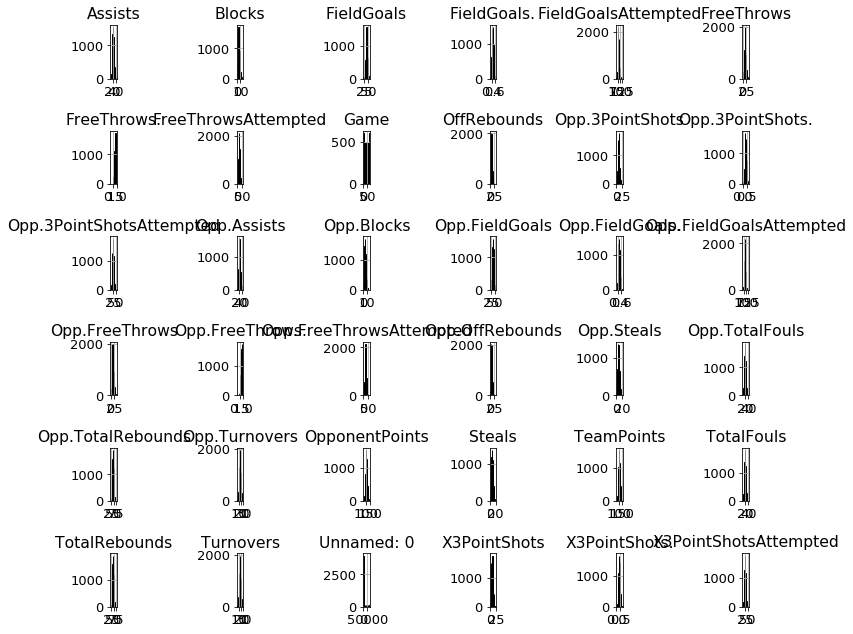

In [23]:
numeric_hists(nba_df)

In [24]:
def hist_plot(df, col, unit_label='', bins=10):
    """
    This function takes in a DataFrame, 
    a string for column name or list,
    a string for unit label, default empty,
    and an integer for number of bins, default 10, and
    displays the distribution of the column.
    """
    plt.rc('figure', figsize=(11, 9))
    plt.rc('font', size=13)
    plt.hist(df[col], bins=bins, color='tomato', ec='black')
    plt.title('Distribution of ' + col)
    plt.xlabel(unit_label)
    plt.ylabel('Count')
    plt.show()

In [36]:
nba_df.columns

Index(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'],
      dtype='object')

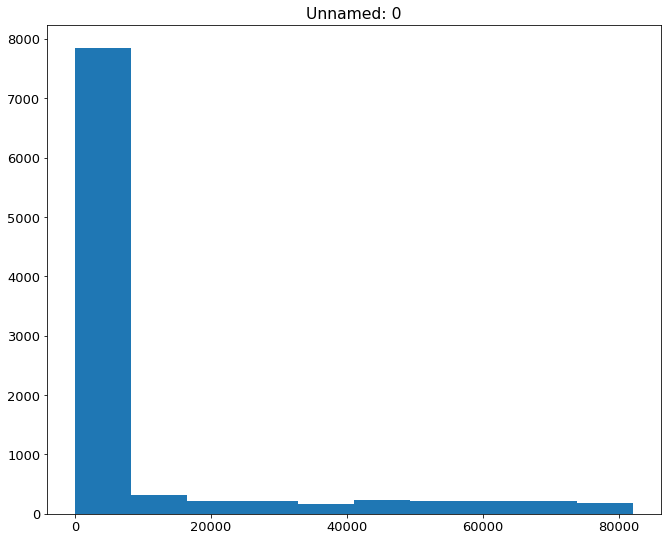

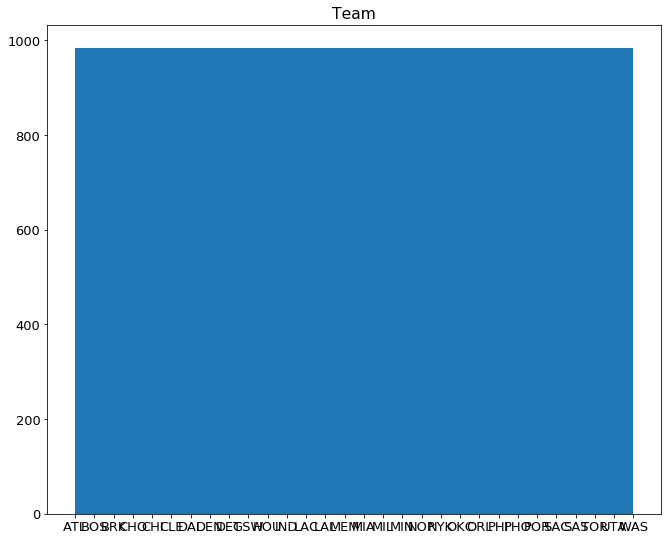

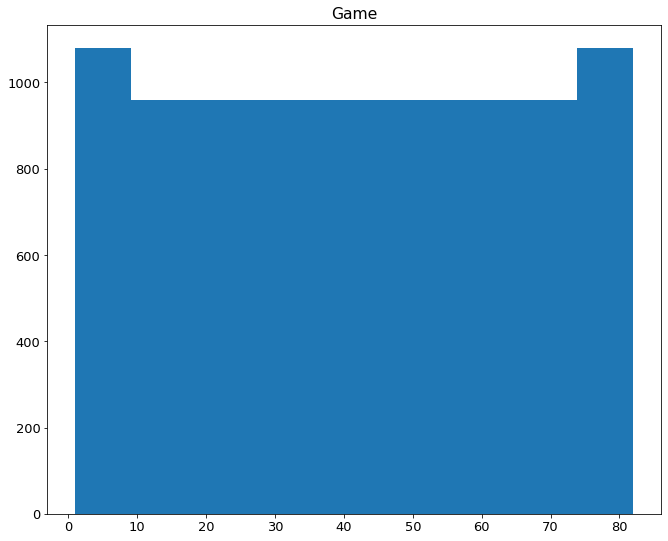

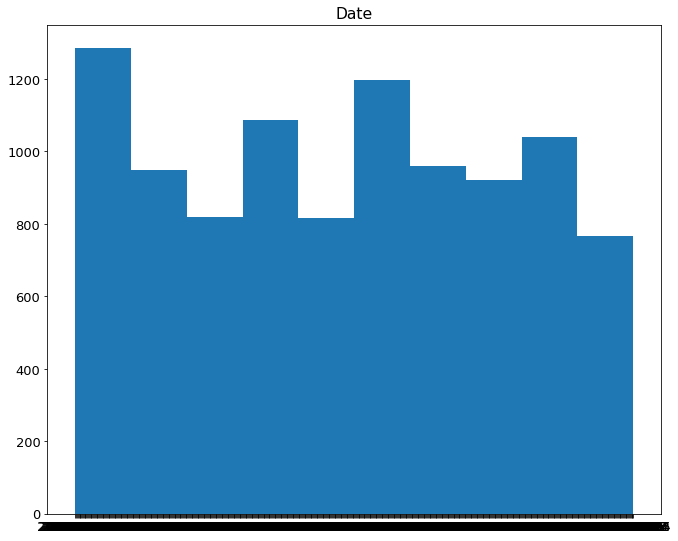

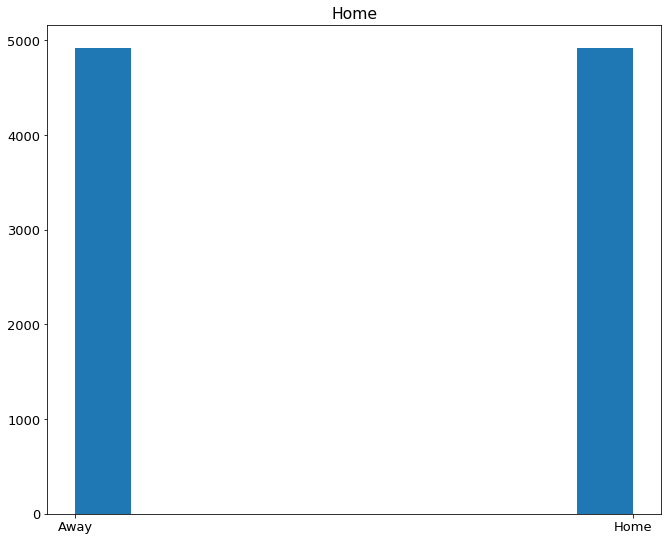

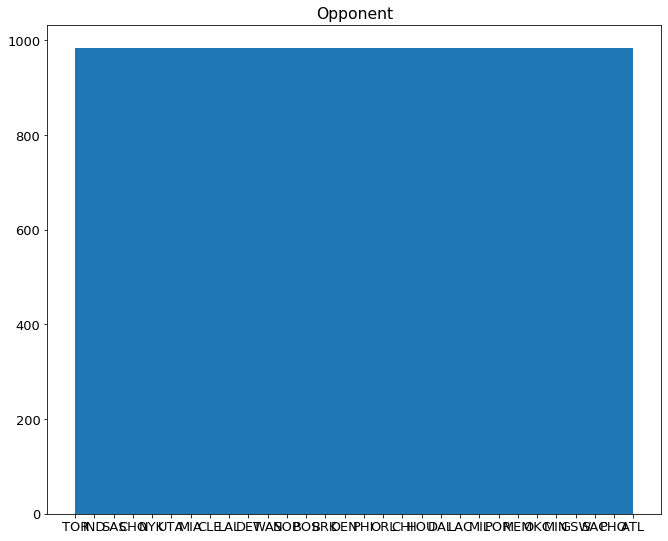

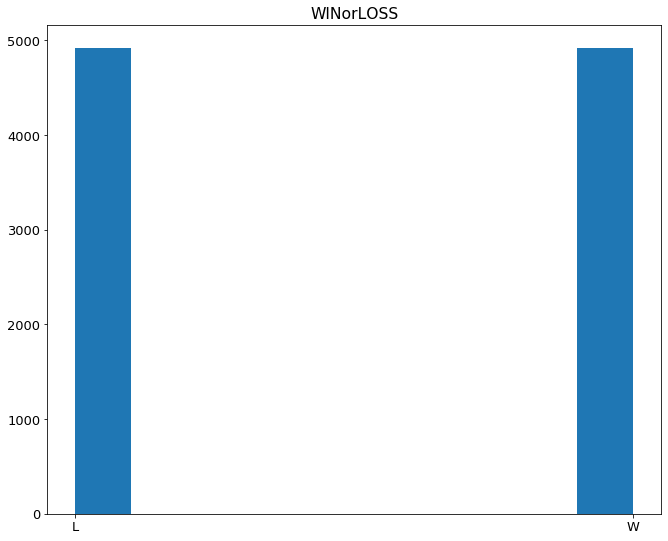

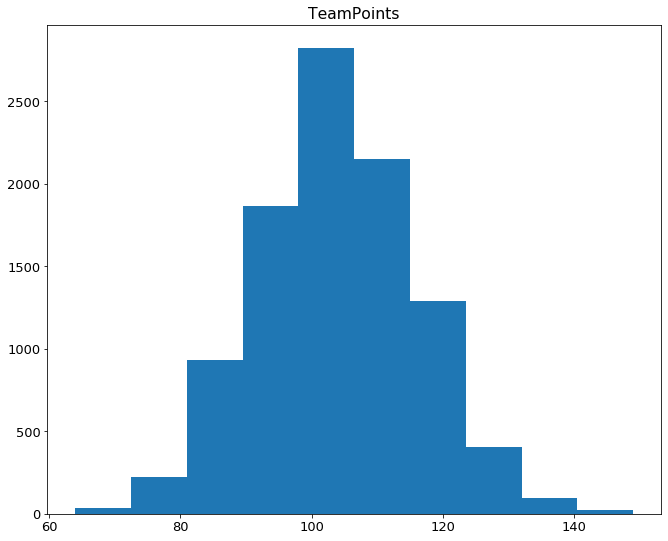

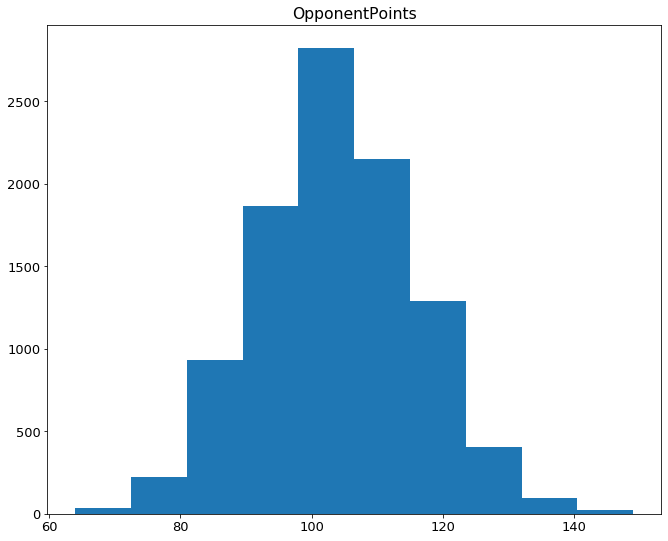

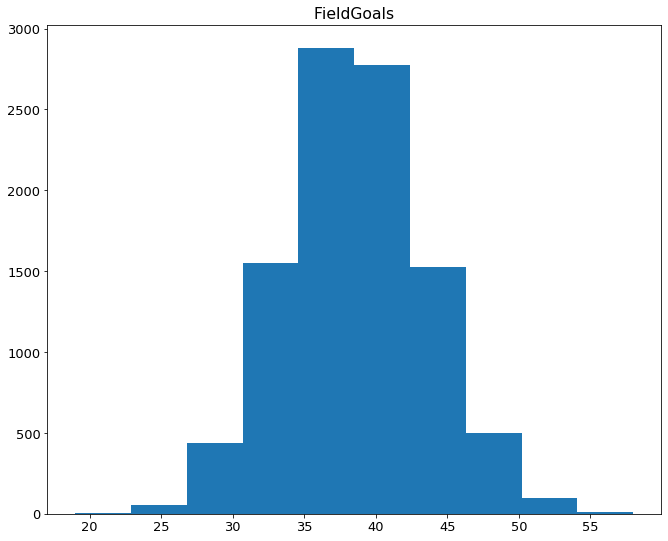

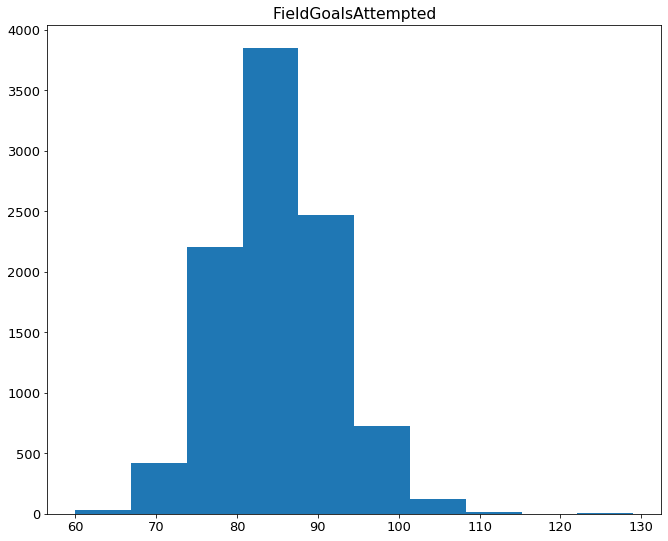

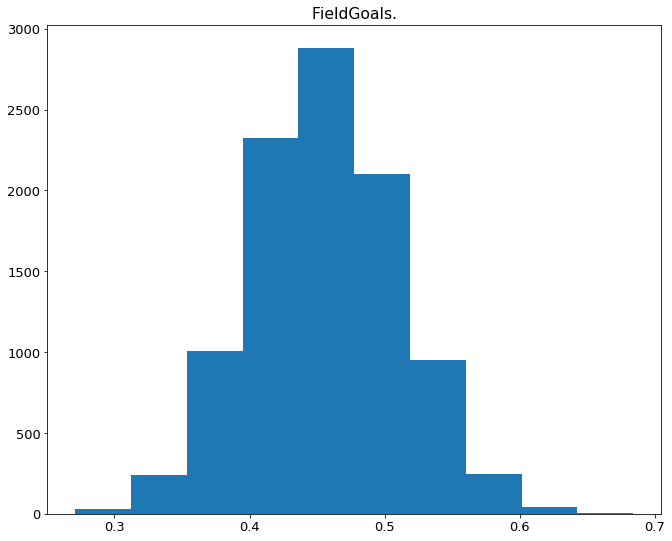

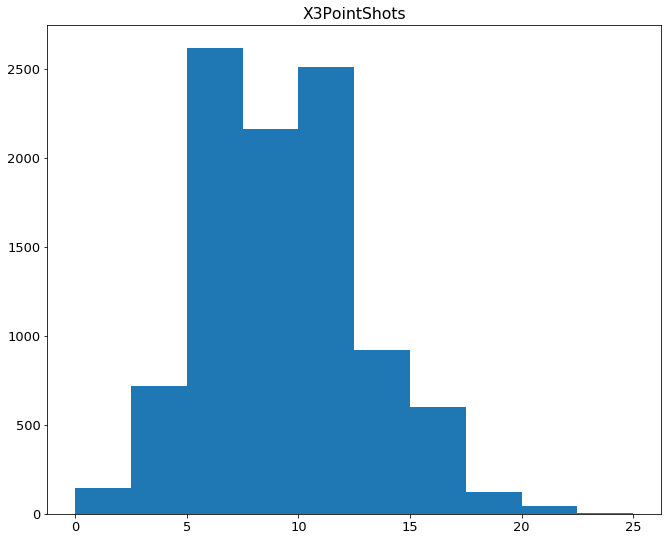

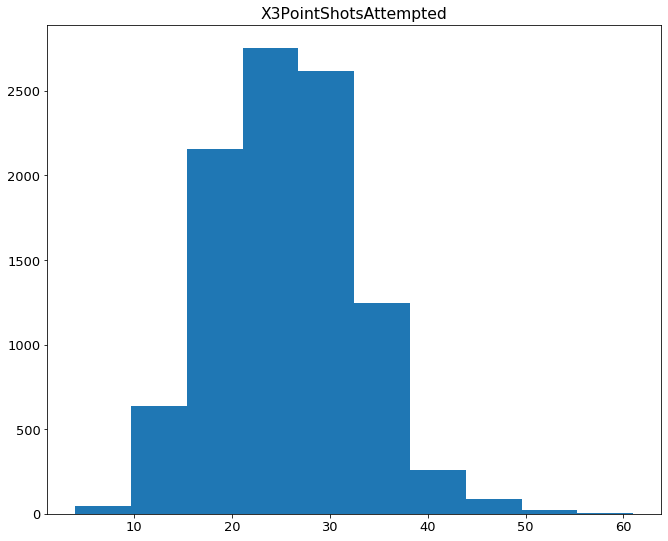

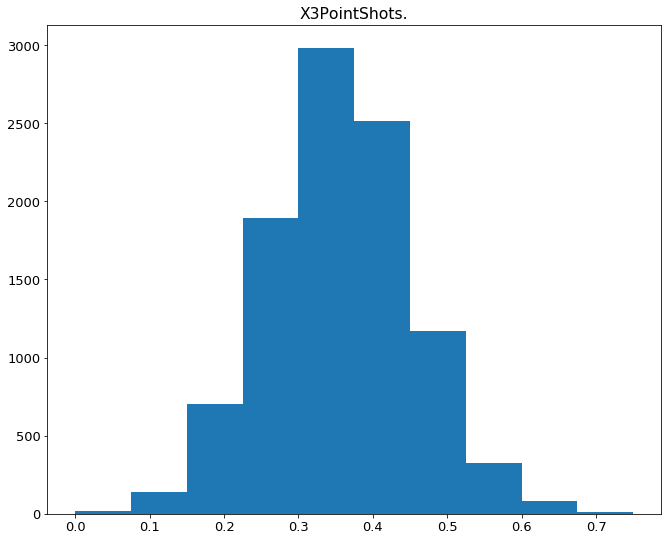

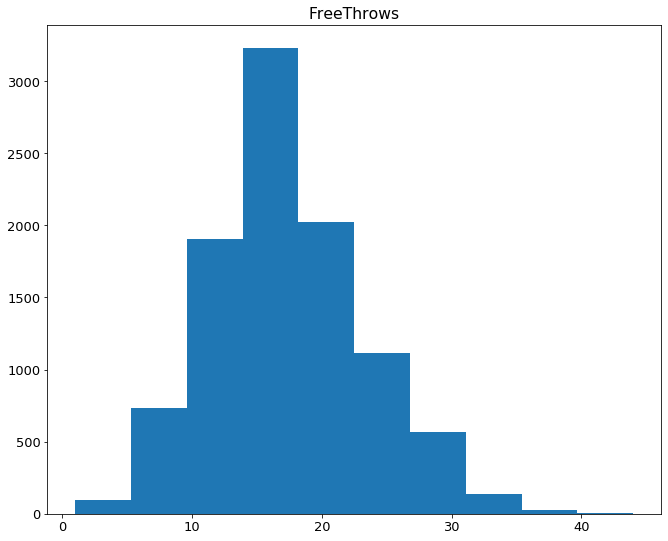

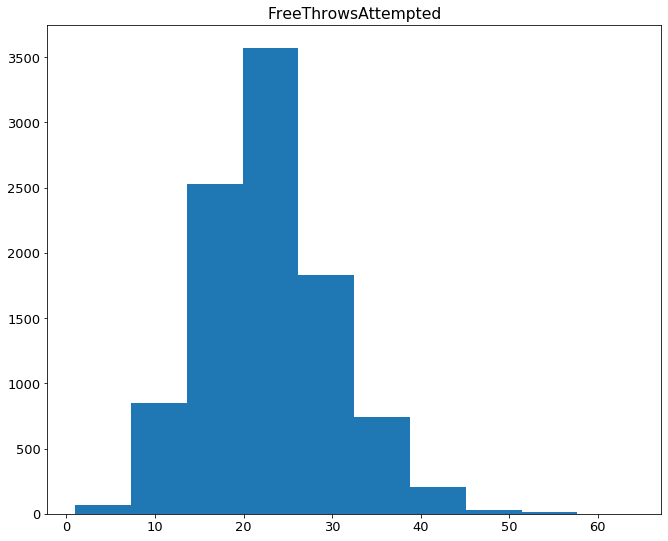

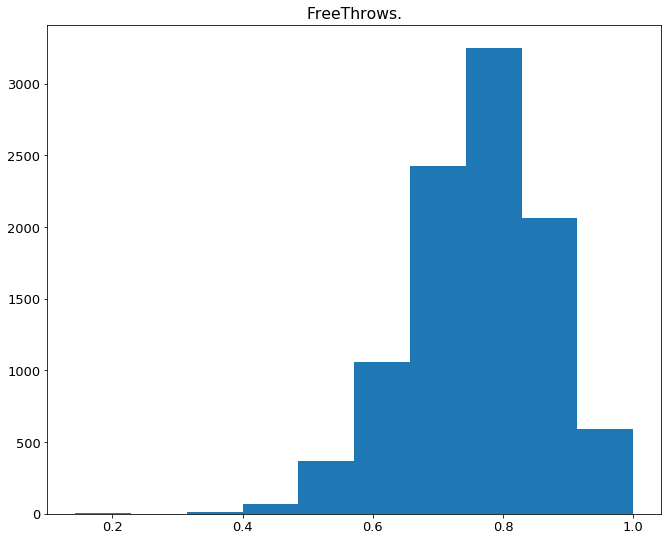

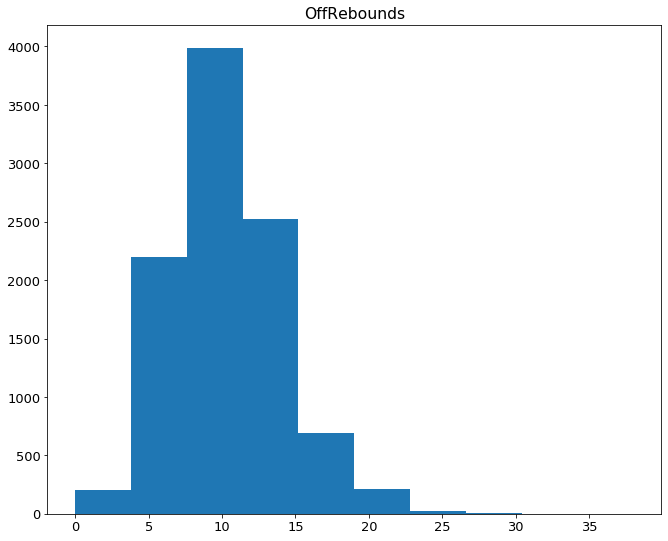

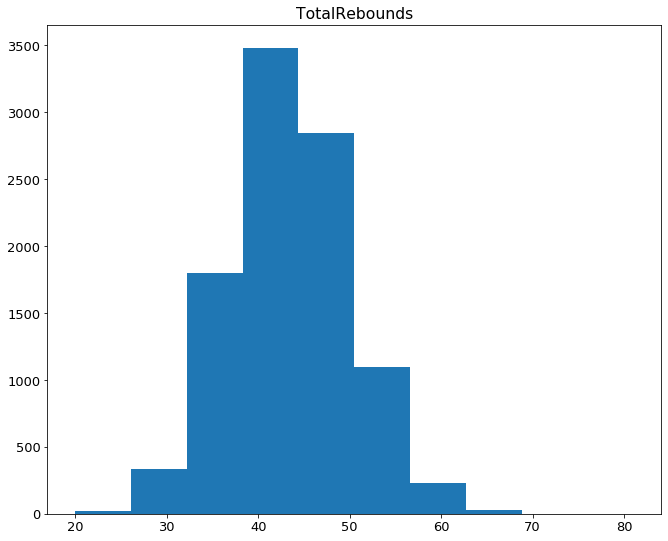

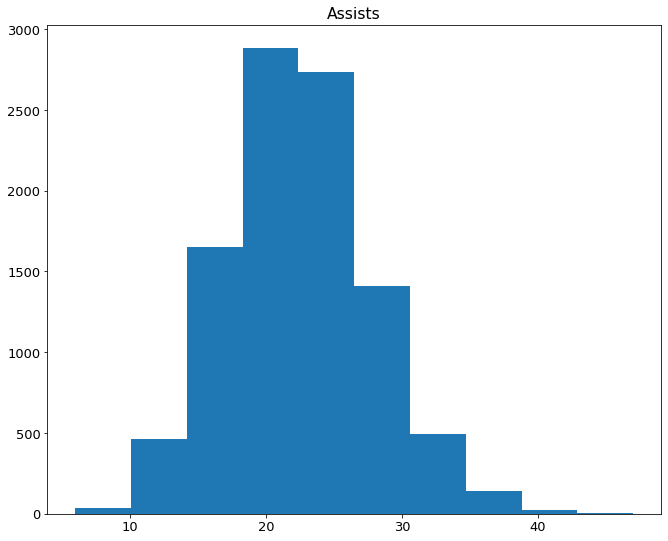

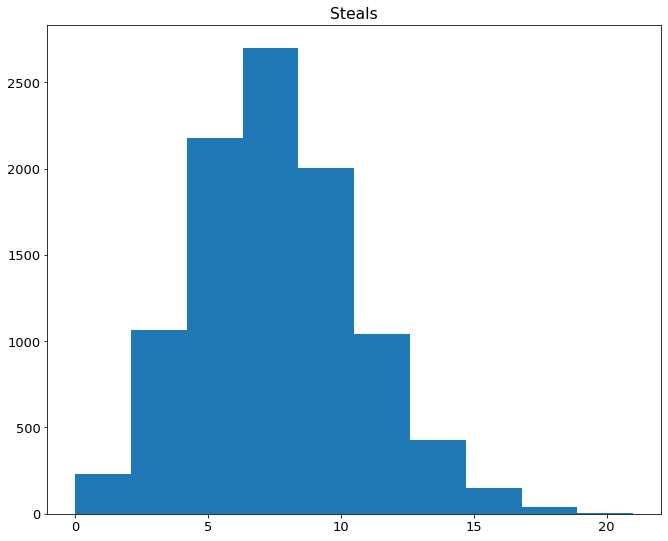

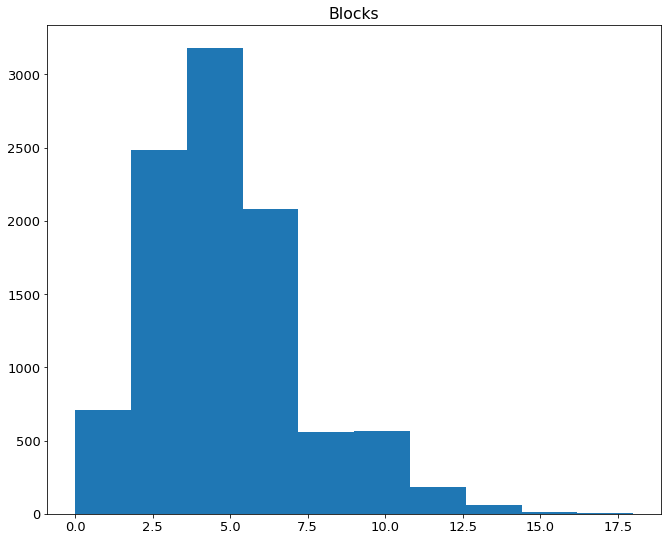

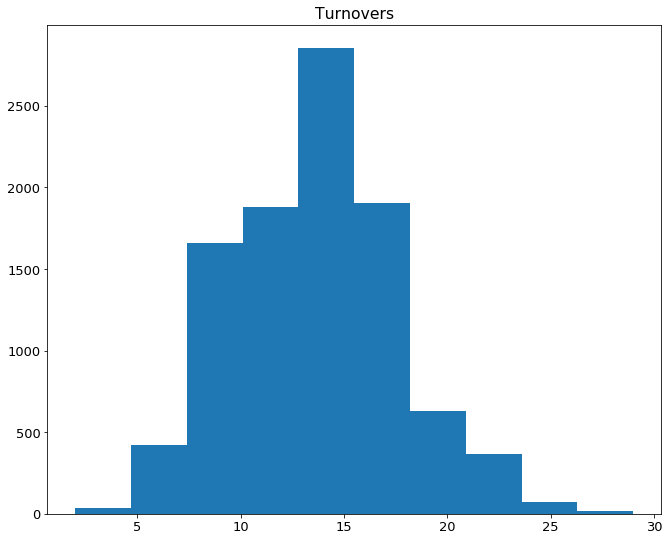

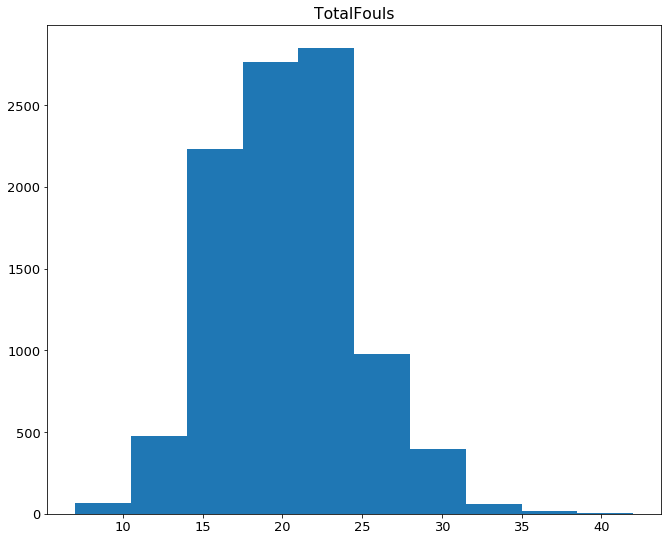

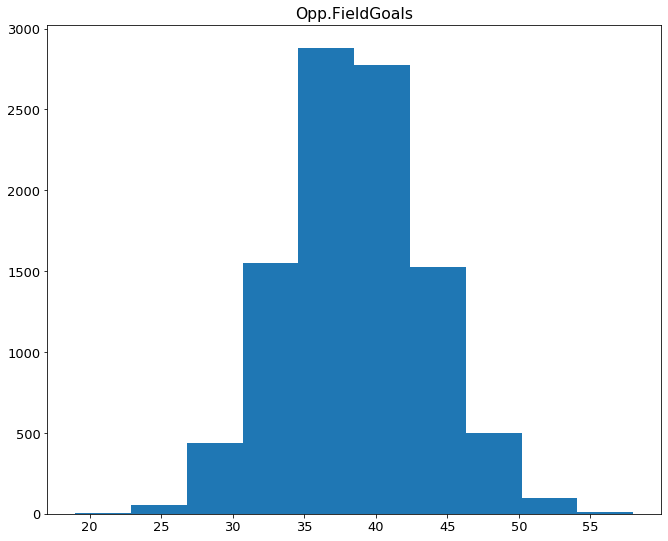

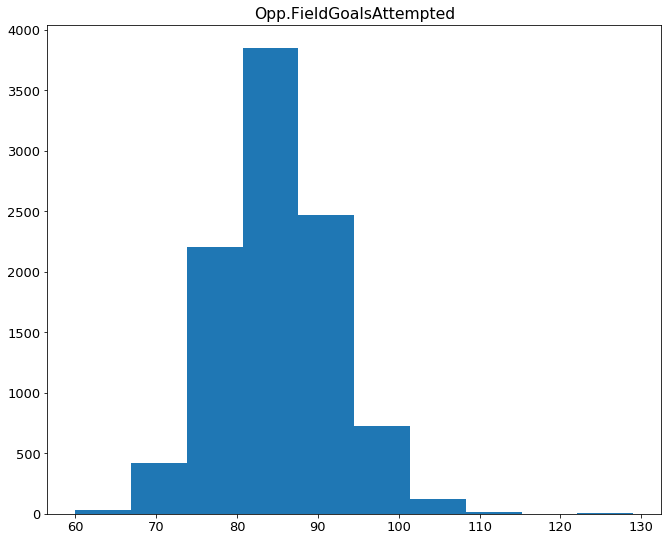

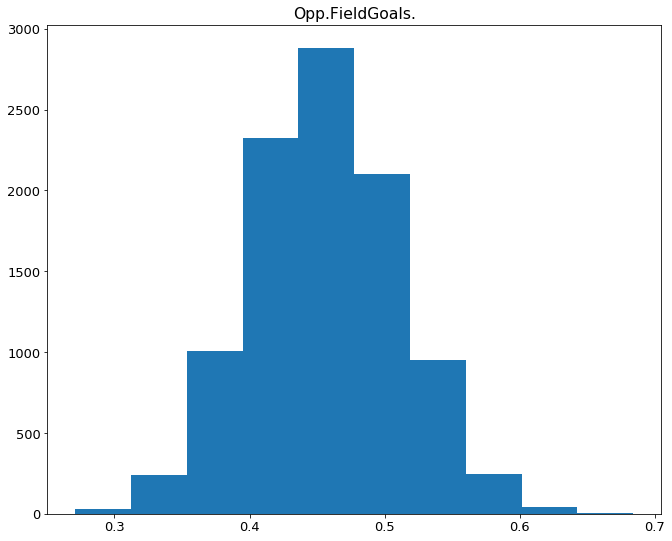

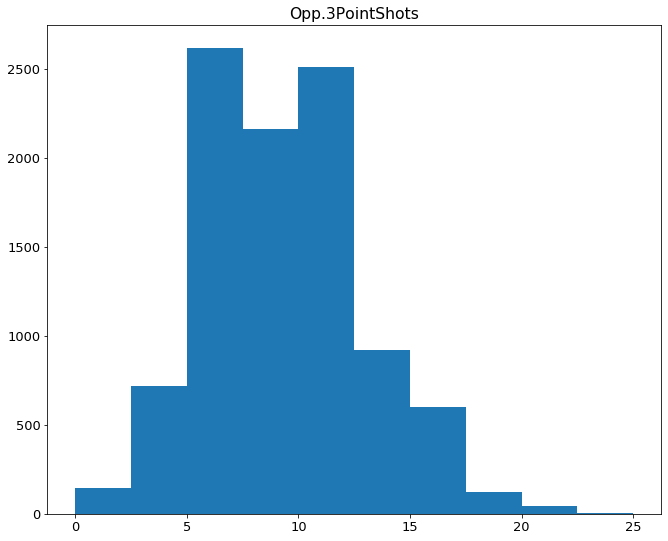

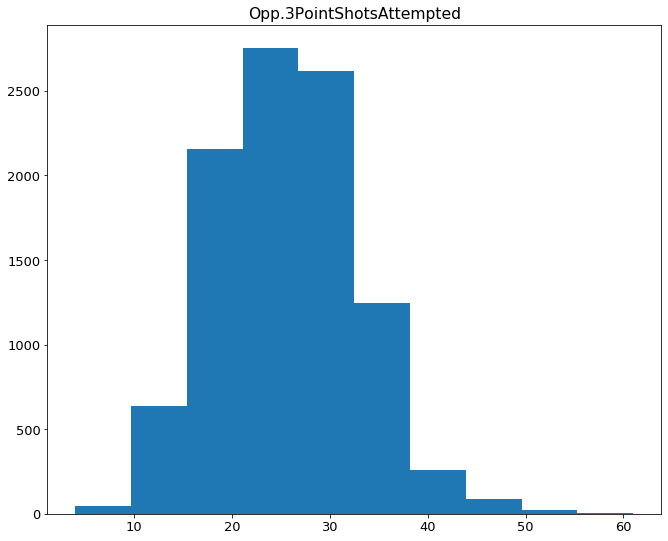

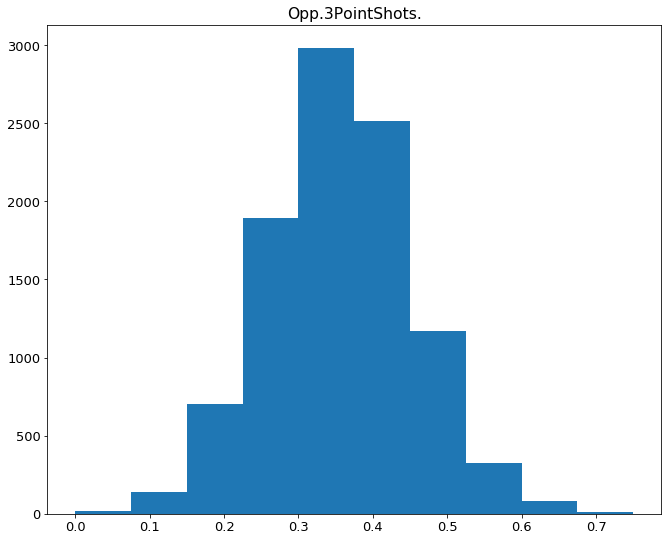

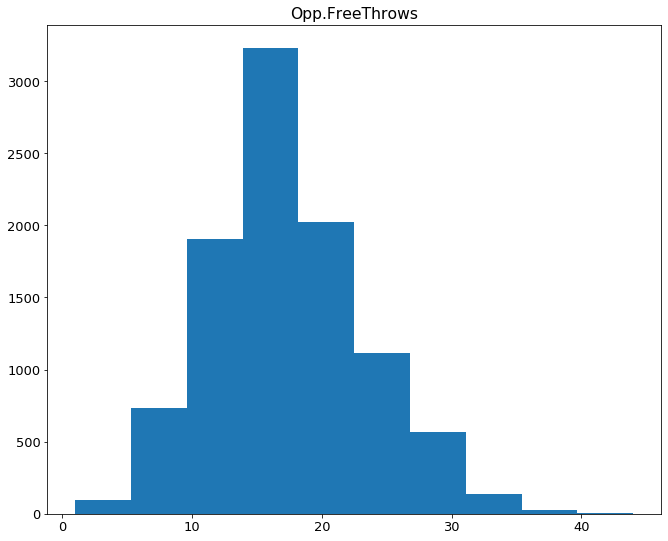

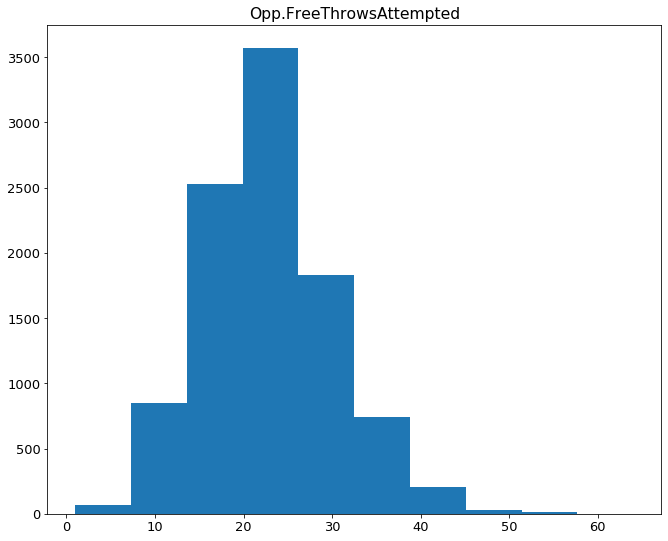

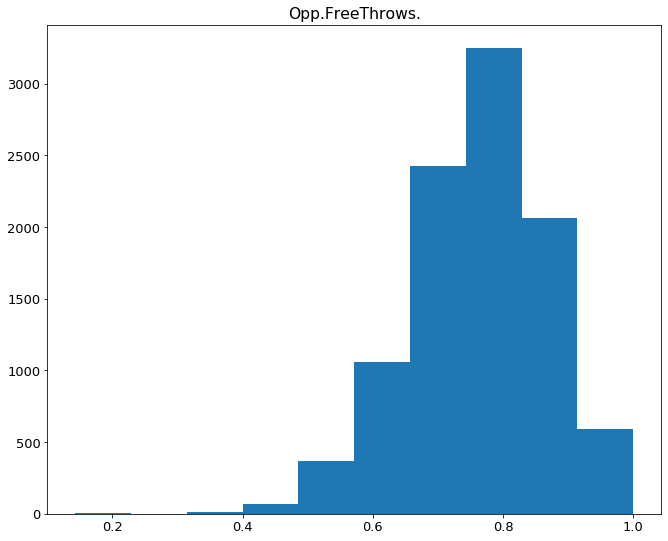

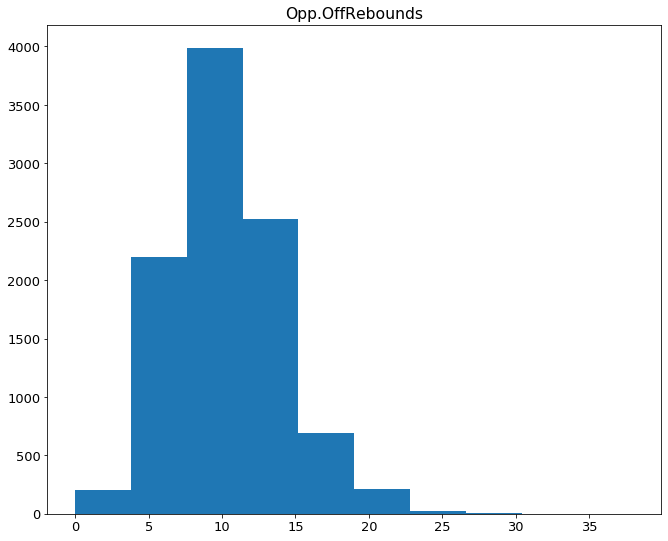

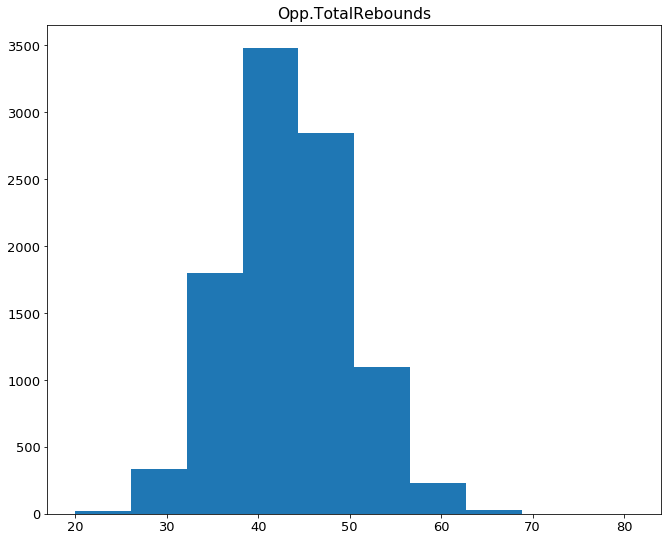

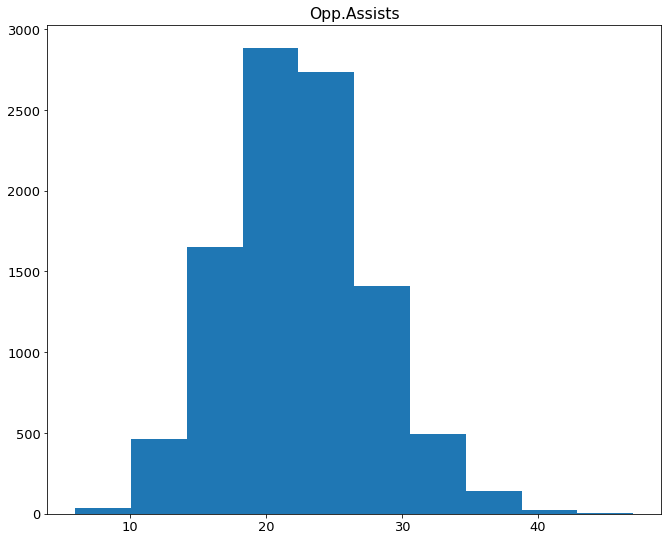

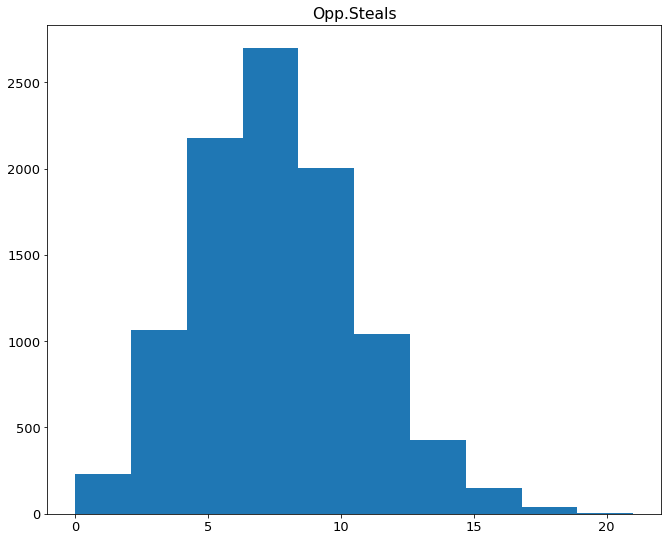

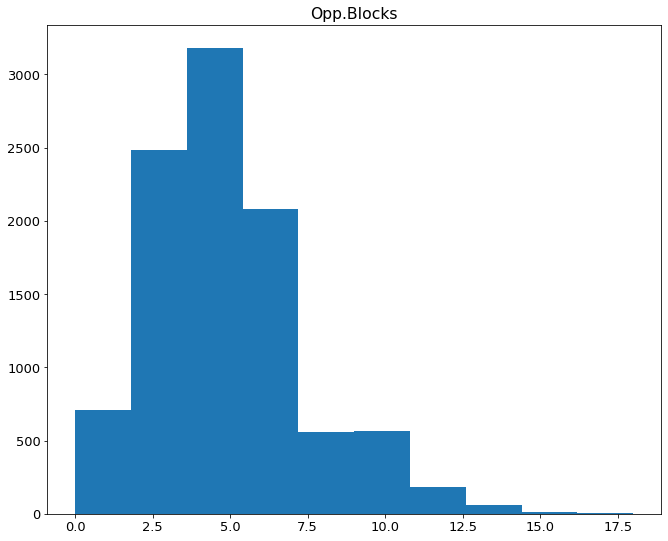

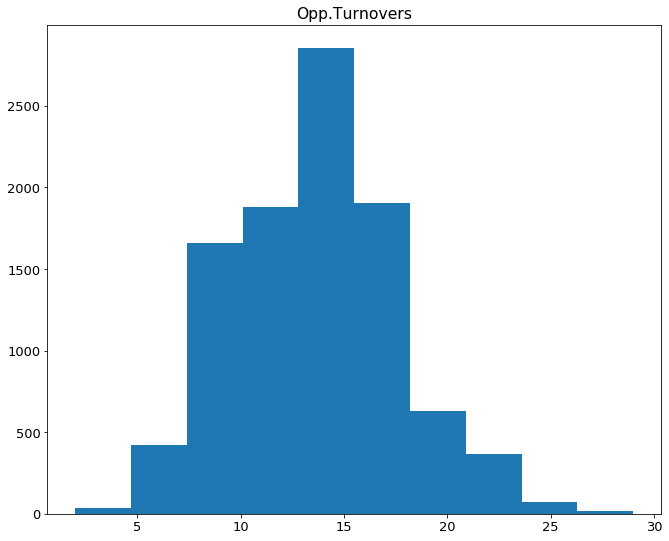

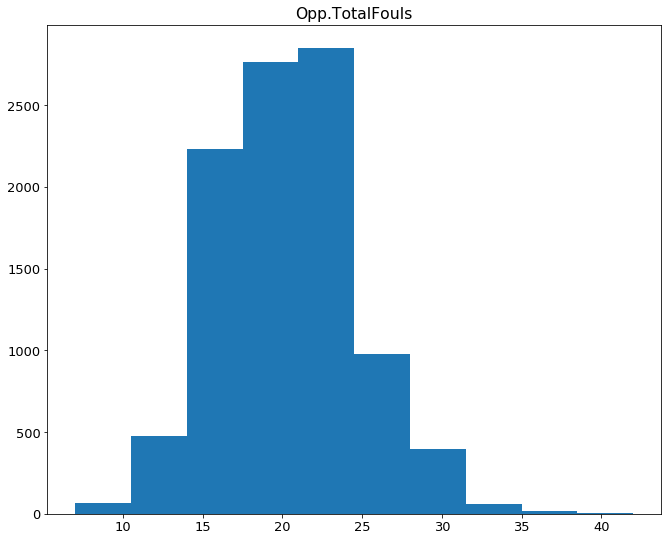

In [45]:
for col in nba_df.columns:
    plt.hist(nba_df[col])
    plt.title(col)
    plt.show()

### Have a lot of normally distributed data

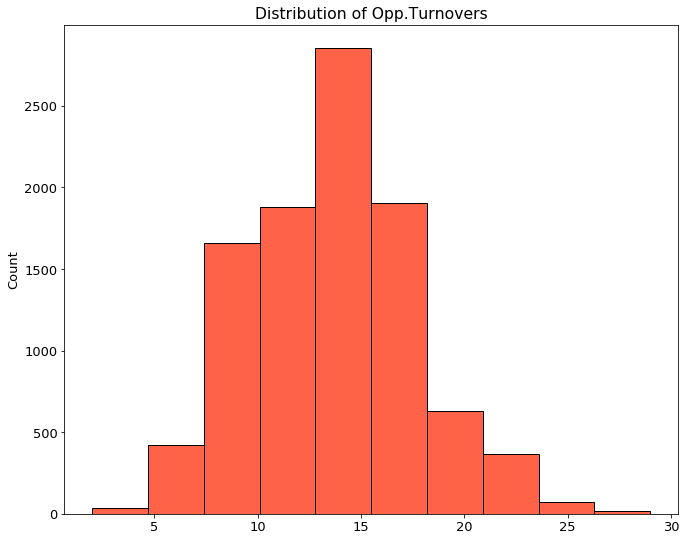

In [37]:
hist_plot(nba_df, 'Opp.Turnovers')

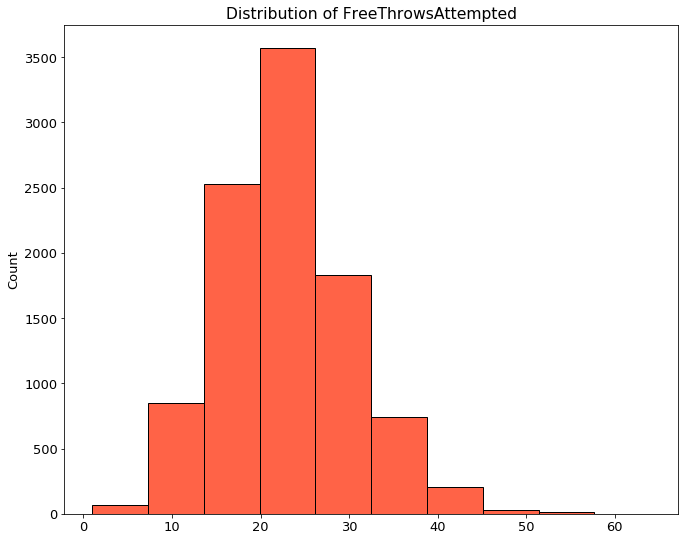

In [38]:
hist_plot(nba_df, 'FreeThrowsAttempted')

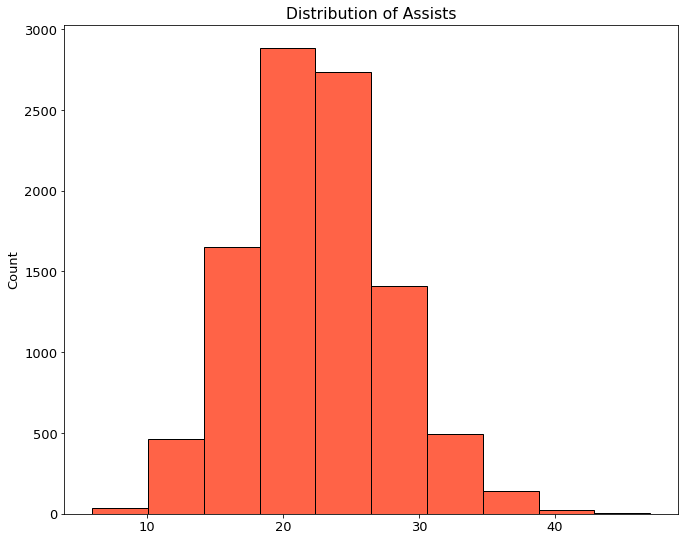

In [40]:
hist_plot(nba_df, 'Assists')

### Going to make columns lowered cased, rename some columns, remove some columns to make it easier to explore

In [50]:
# Lower casing columns names
df = nba_df.rename(str.lower, axis='columns')

In [53]:
df.head().T

,0,1,2,3,4
unnamed: 0,1,2,3,4,5
team,ATL,ATL,ATL,ATL,ATL
game,1,2,3,4,5
date,2014-10-29,2014-11-01,2014-11-05,2014-11-07,2014-11-08
home,Away,Home,Away,Away,Home
opponent,TOR,IND,SAS,CHO,NYK
winorloss,L,W,L,L,W
teampoints,102,102,92,119,103
opponentpoints,109,92,94,122,96
fieldgoals,40,35,38,43,33


In [52]:
df.columns

Index(['unnamed: 0', 'team', 'game', 'date', 'home', 'opponent', 'winorloss',
       'teampoints', 'opponentpoints', 'fieldgoals', 'fieldgoalsattempted',
       'fieldgoals.', 'x3pointshots', 'x3pointshotsattempted', 'x3pointshots.',
       'freethrows', 'freethrowsattempted', 'freethrows.', 'offrebounds',
       'totalrebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'totalfouls', 'opp.fieldgoals', 'opp.fieldgoalsattempted',
       'opp.fieldgoals.', 'opp.3pointshots', 'opp.3pointshotsattempted',
       'opp.3pointshots.', 'opp.freethrows', 'opp.freethrowsattempted',
       'opp.freethrows.', 'opp.offrebounds', 'opp.totalrebounds',
       'opp.assists', 'opp.steals', 'opp.blocks', 'opp.turnovers',
       'opp.totalfouls'],
      dtype='object')

In [58]:
# Renaming column names
df = df.rename(columns={'fieldgoals.': 'fieldgoal_pct', 'x3pointshots.': 'x3pointshots_pct', 
                   'freethrows.': 'freethrows_pct', 'opp.fieldgoals.': 'opp_fieldgoal_pct',
                  'opp.freethrows.':'opp_freethrows_pct', 'opp.3pointshots.':'opp_3pointshots_pct'})

In [59]:
df.head().T

,0,1,2,3,4
unnamed: 0,1,2,3,4,5
team,ATL,ATL,ATL,ATL,ATL
game,1,2,3,4,5
date,2014-10-29,2014-11-01,2014-11-05,2014-11-07,2014-11-08
home,Away,Home,Away,Away,Home
opponent,TOR,IND,SAS,CHO,NYK
winorloss,L,W,L,L,W
teampoints,102,102,92,119,103
opponentpoints,109,92,94,122,96
fieldgoals,40,35,38,43,33


In [63]:
# dropping unamed column
df = df.drop(columns ='unnamed: 0')

In [70]:
def prepare_nba(df):
    '''
   This function cleans up the column names, deletes columns, renames some columns 
   to read easier and makes histograms of the columns
    '''
    # Lower casing columns names
    df = nba_df.rename(str.lower, axis='columns')
    
    # Renaming column names
    df = df.rename(columns={'fieldgoals.': 'fieldgoal_pct', 'x3pointshots.': 'x3pointshots_pct', 
                   'freethrows.': 'freethrows_pct', 'opp.fieldgoals.': 'opp_fieldgoal_pct',
                  'opp.freethrows.':'opp_freethrows_pct', 'opp.3pointshots.':'opp_3pointshots_pct'})
    # dropping unamed column
    df = df.drop(columns ='unnamed: 0')
    
    for col in nba_df.columns:
        plt.hist(nba_df[col])
        plt.title(col)
        plt.show()
    
    return df

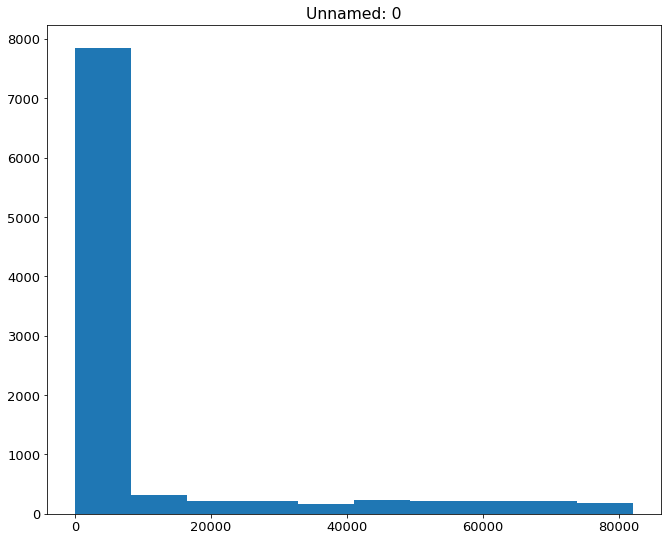

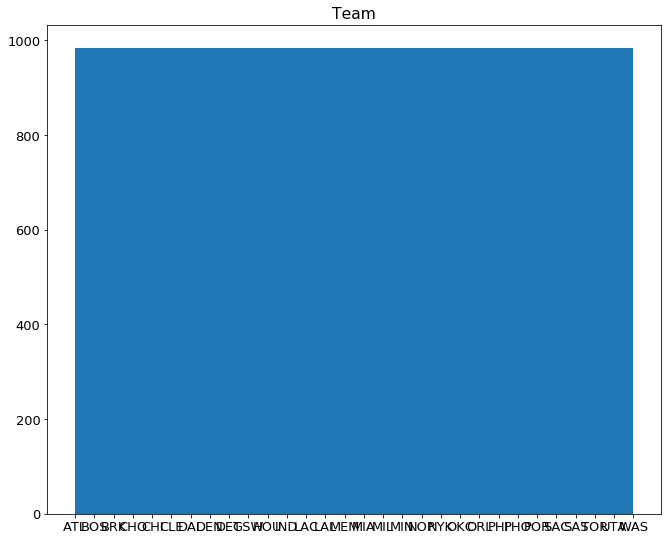

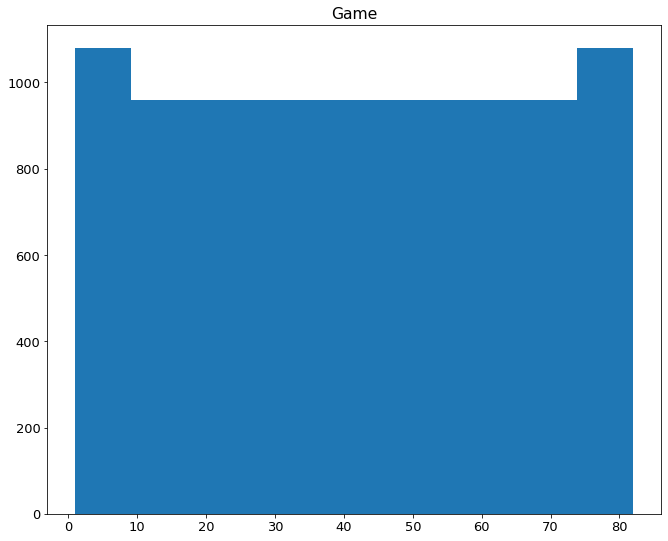

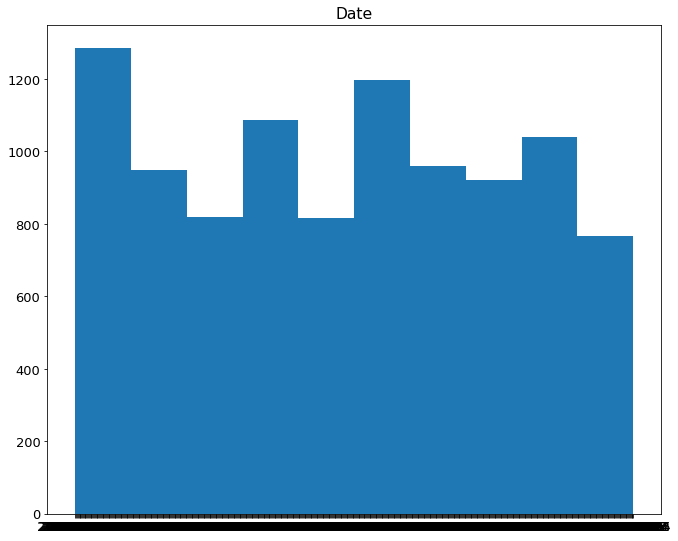

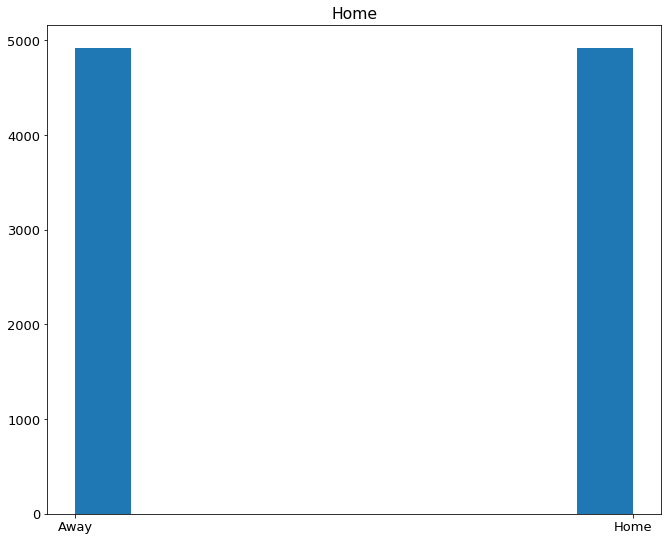

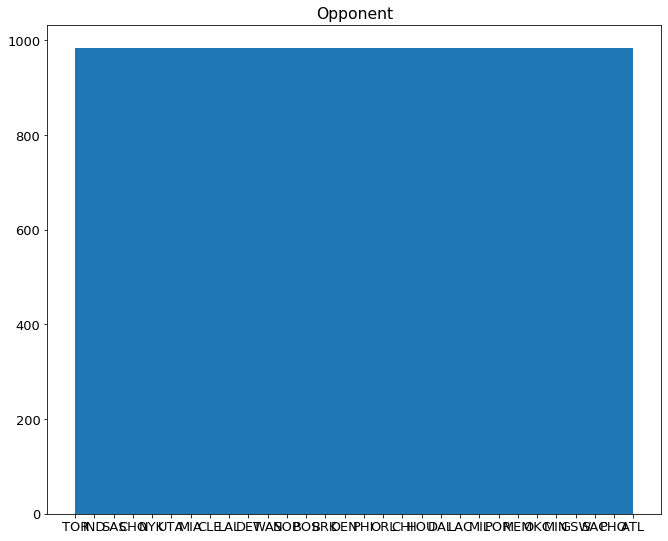

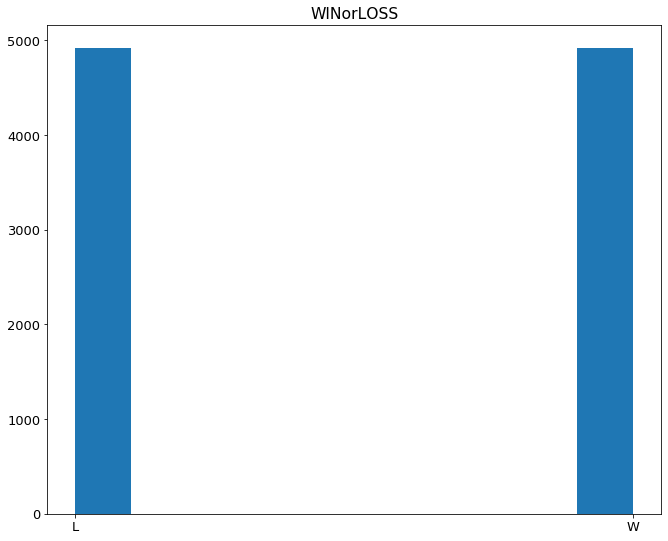

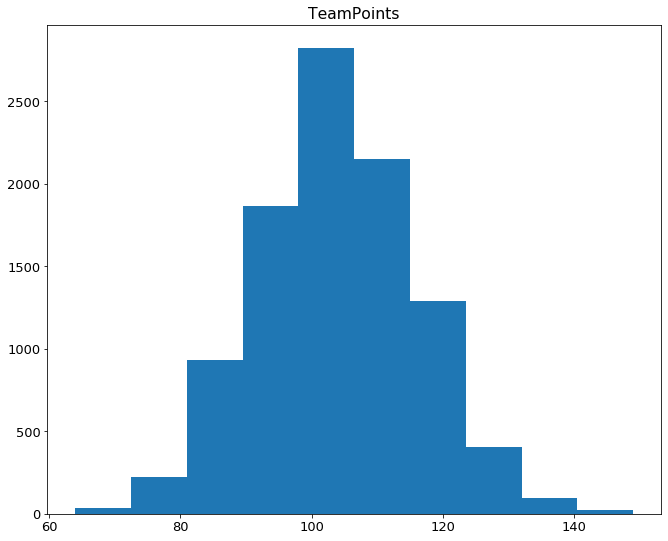

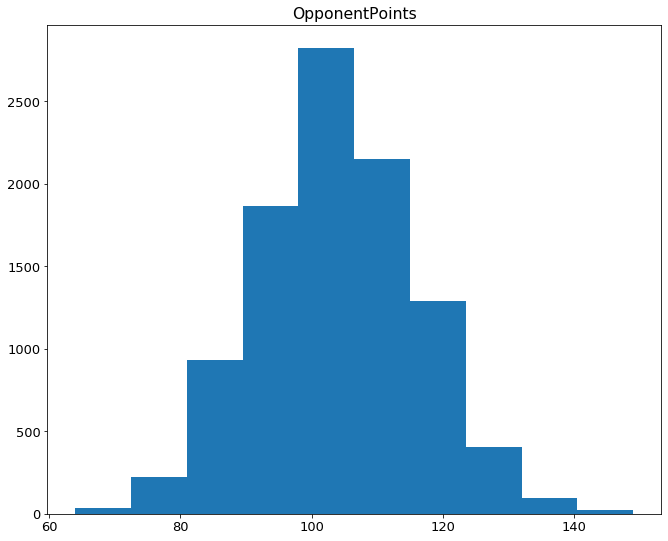

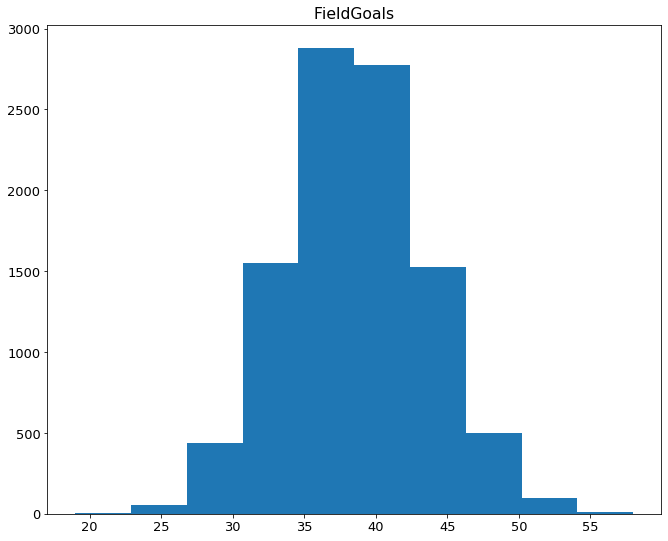

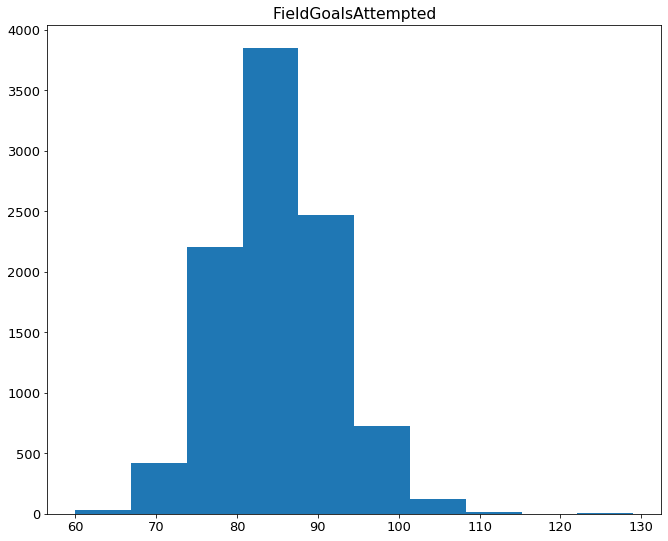

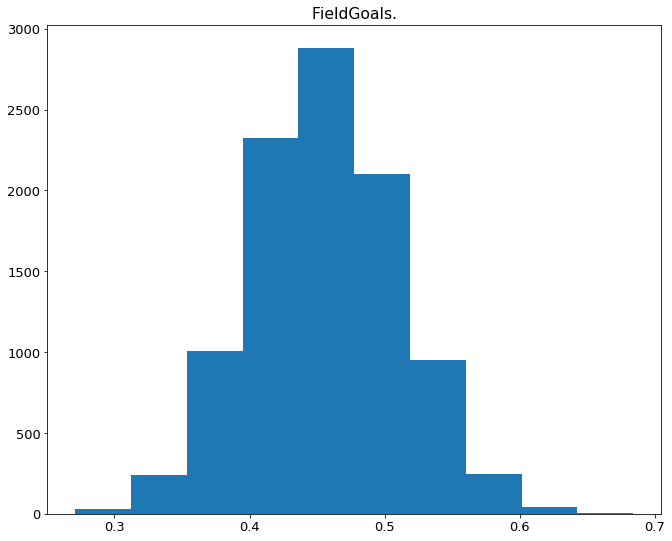

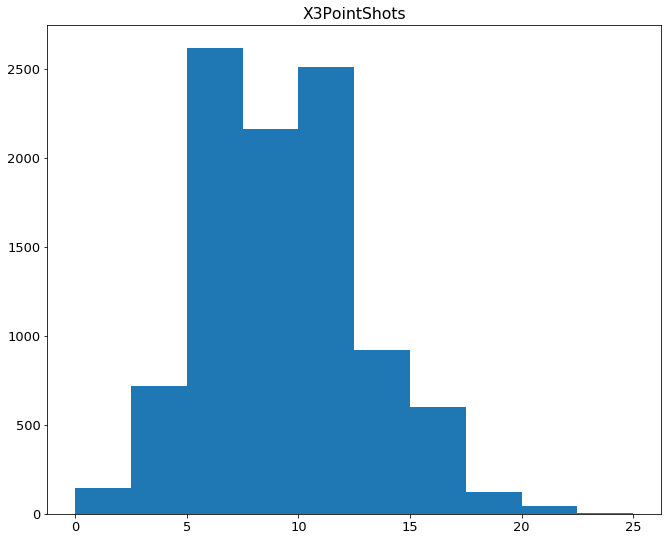

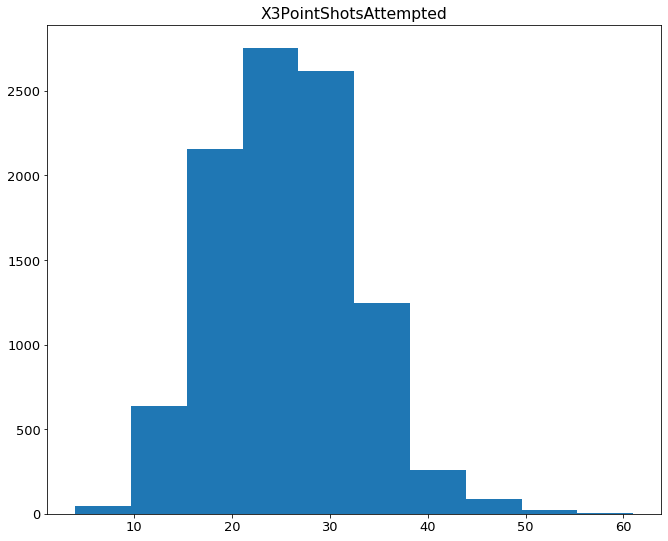

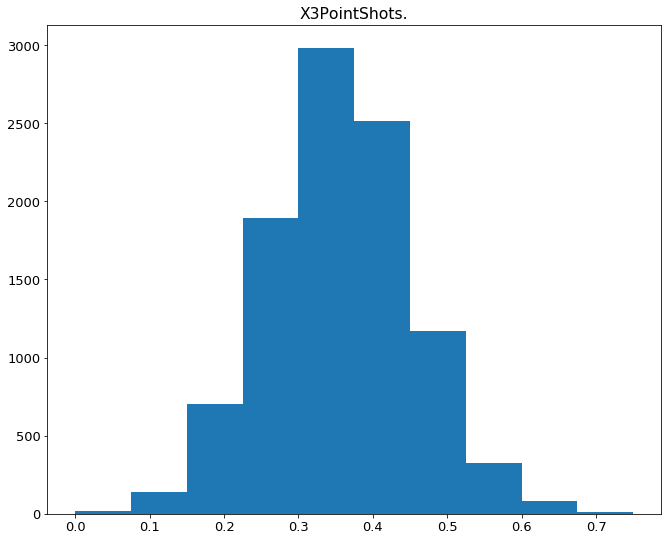

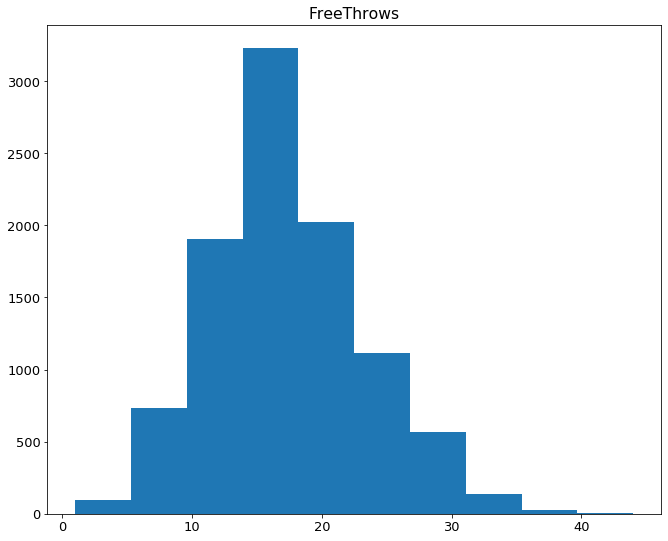

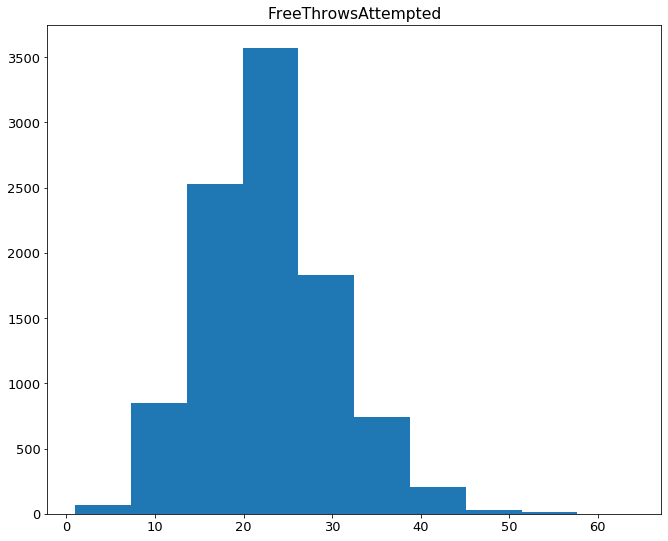

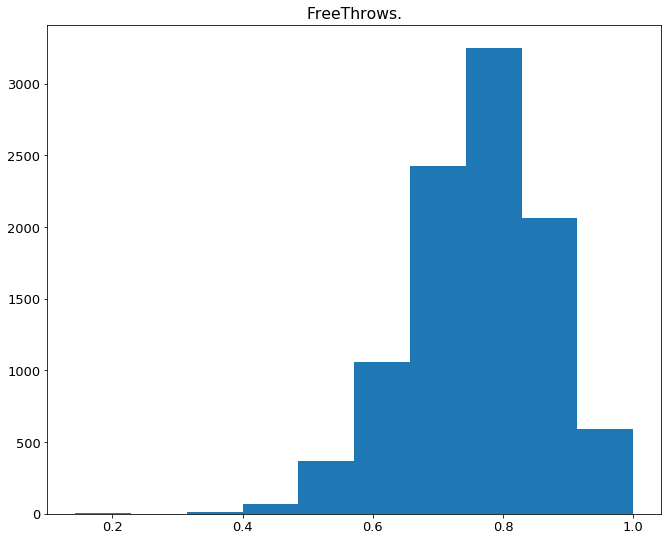

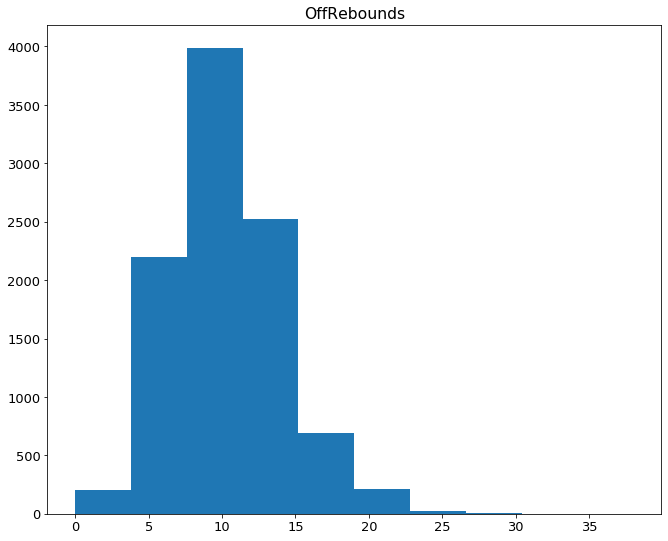

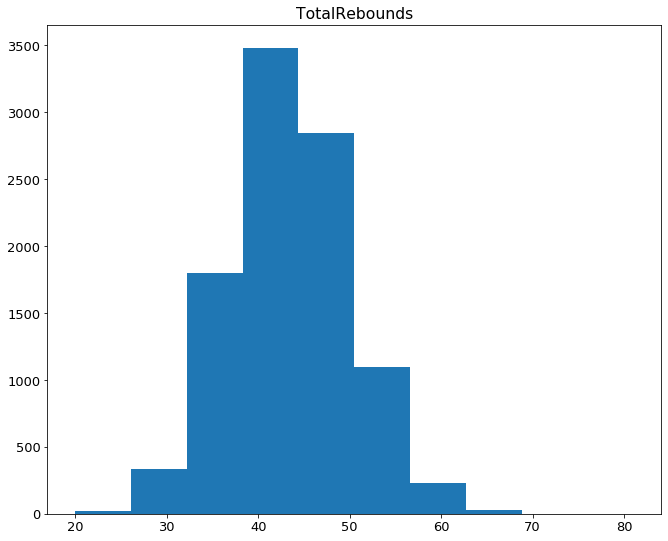

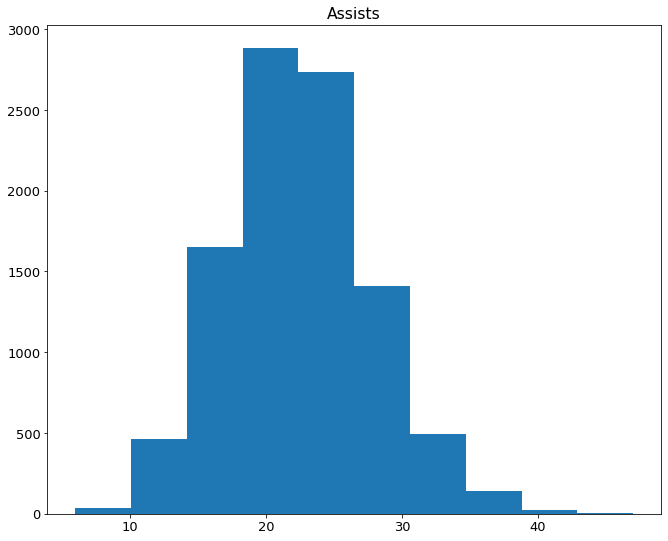

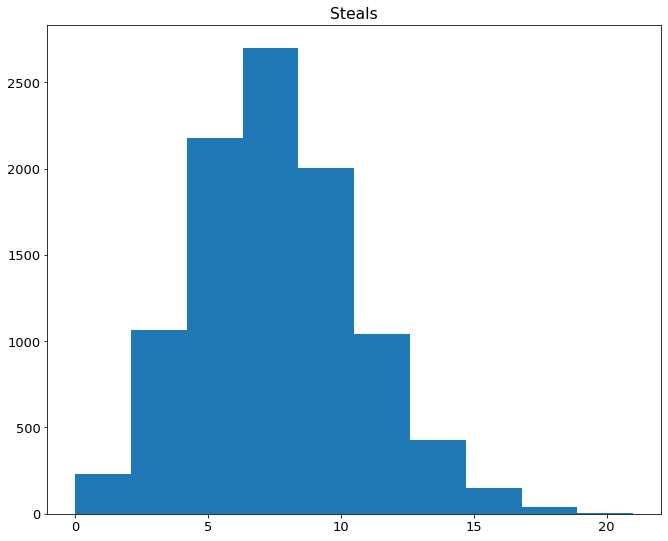

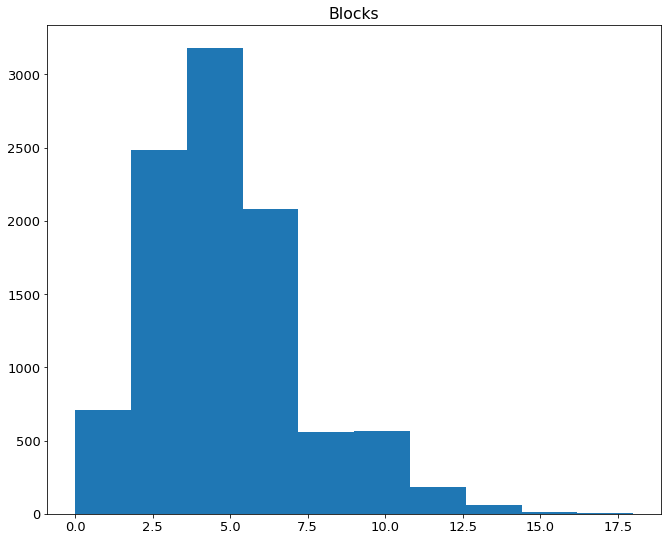

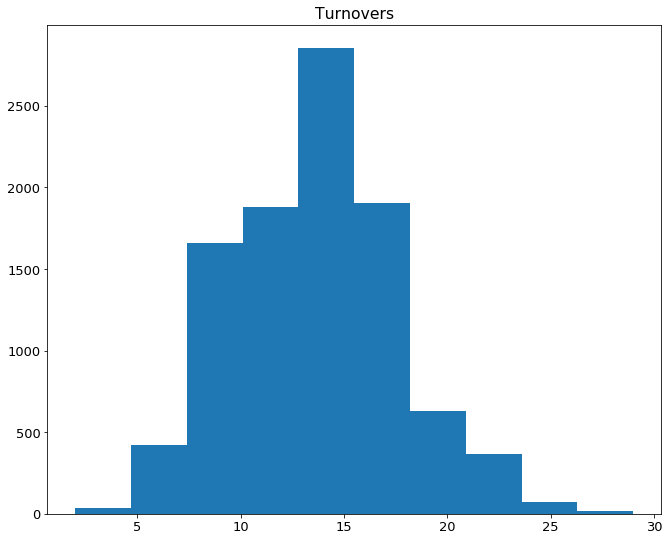

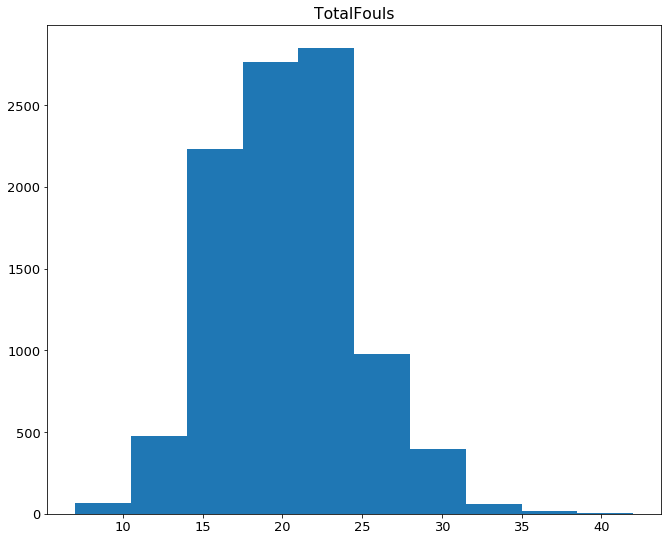

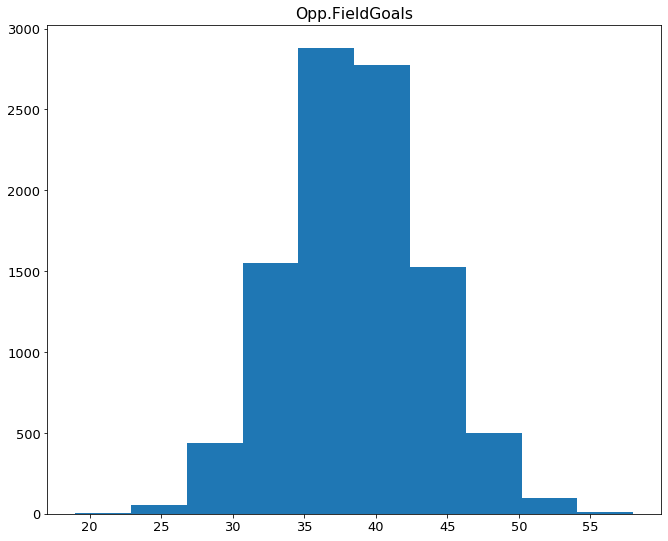

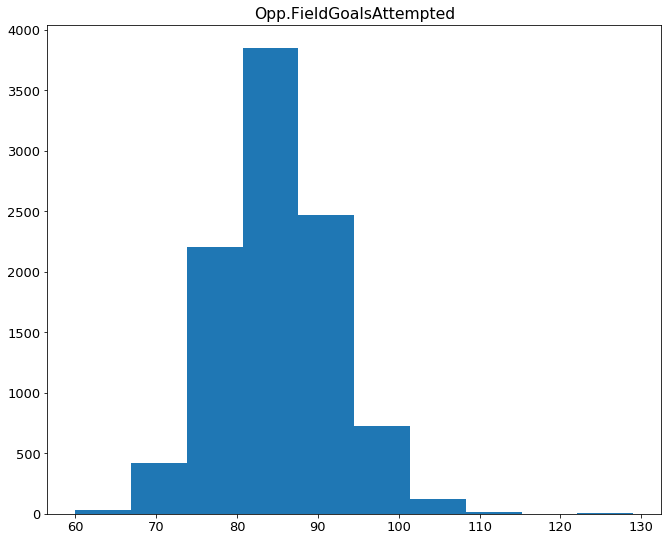

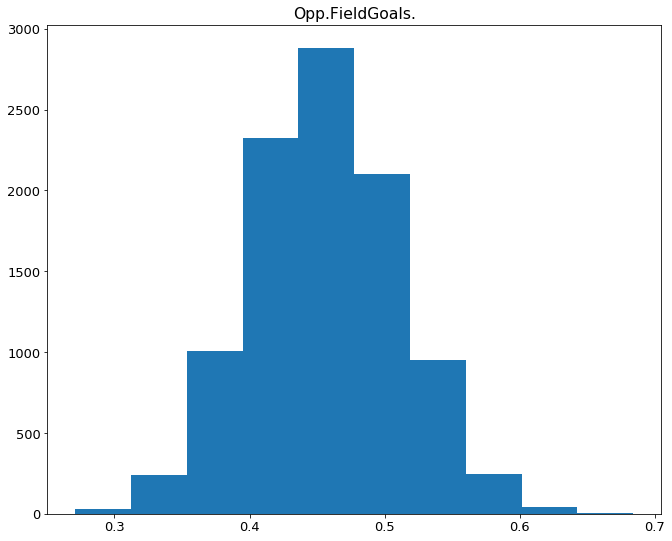

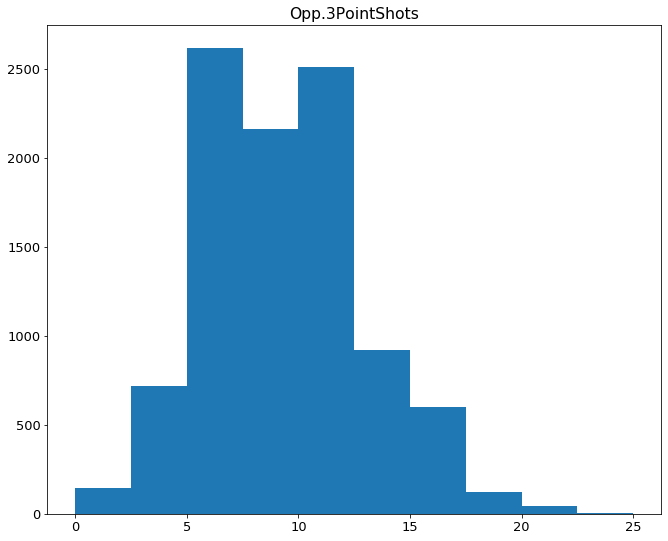

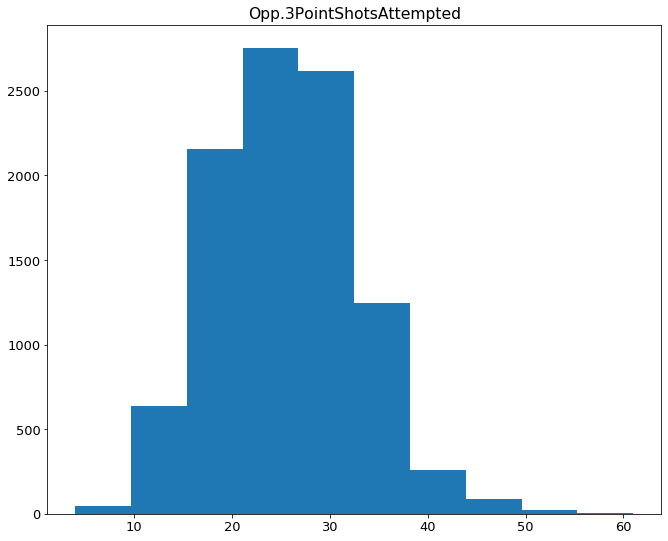

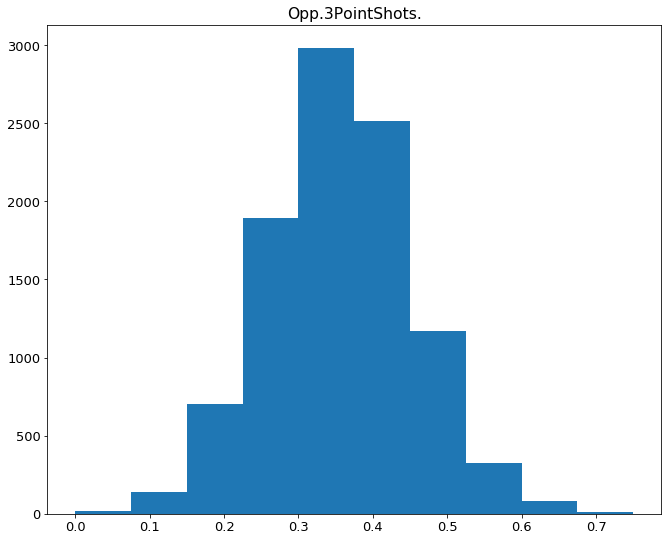

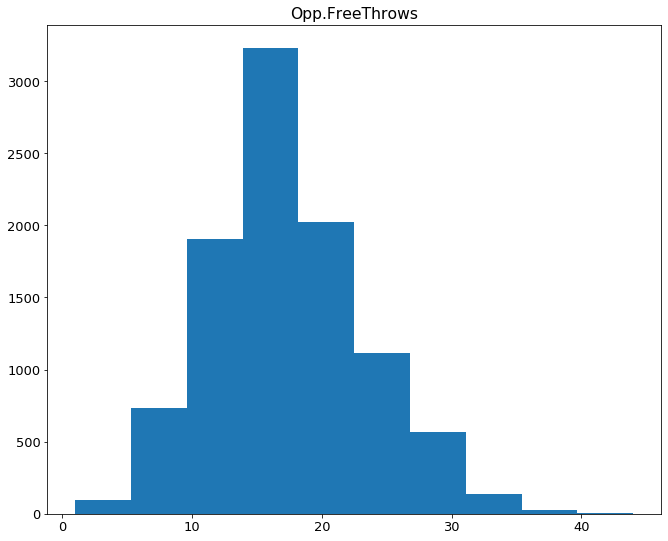

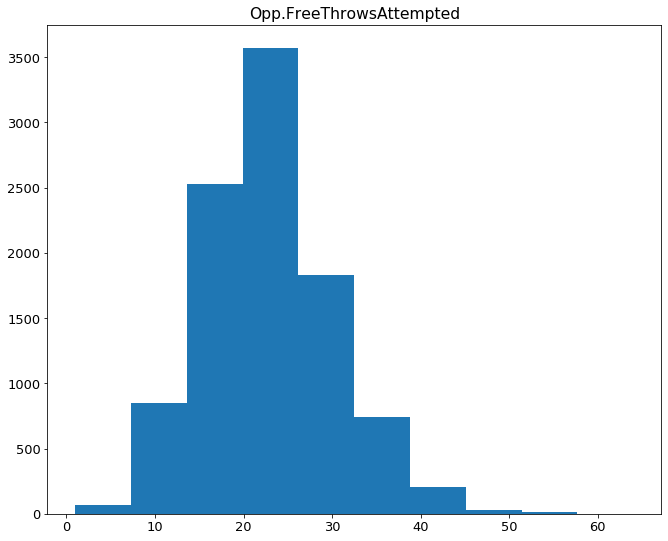

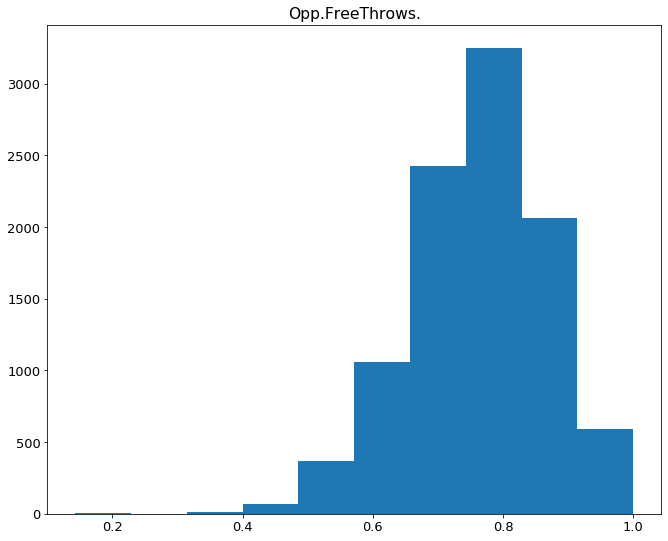

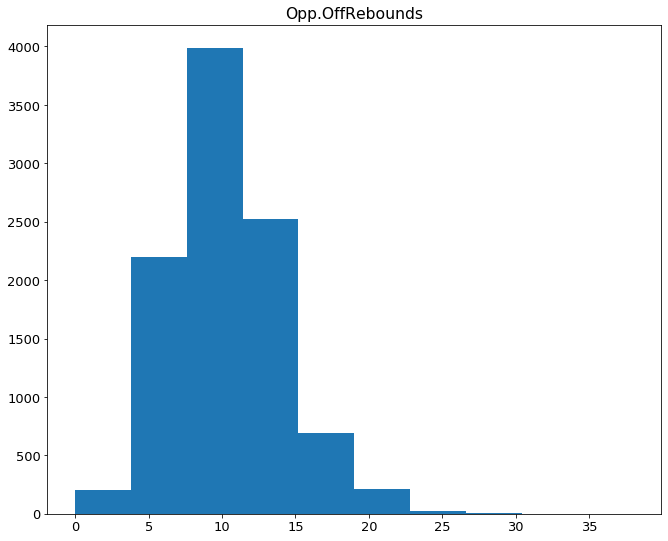

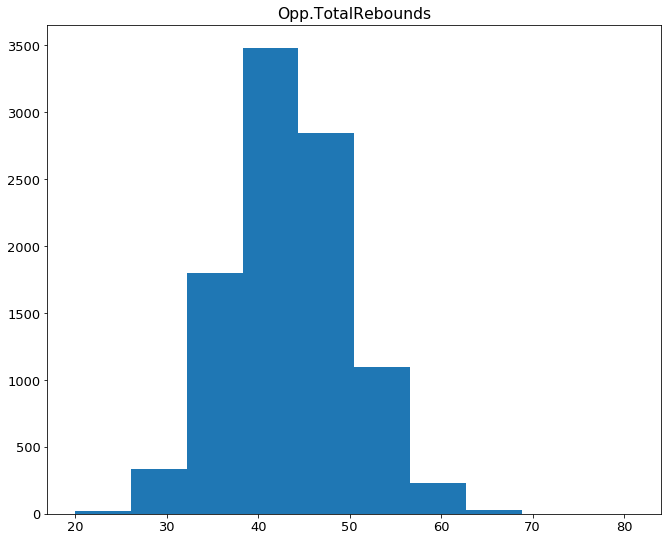

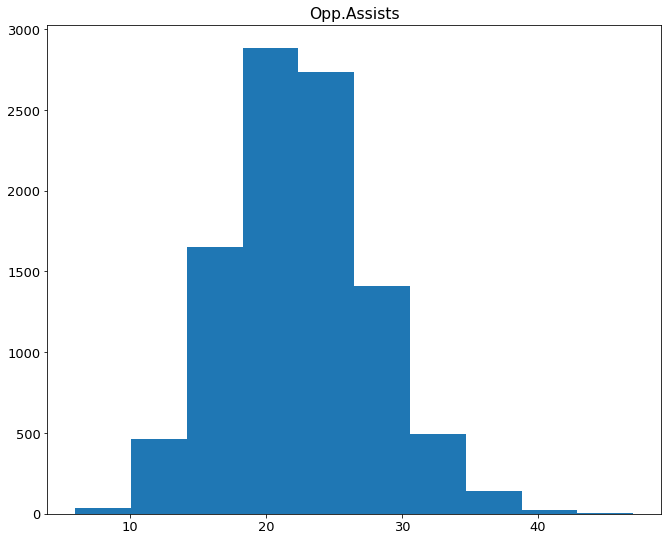

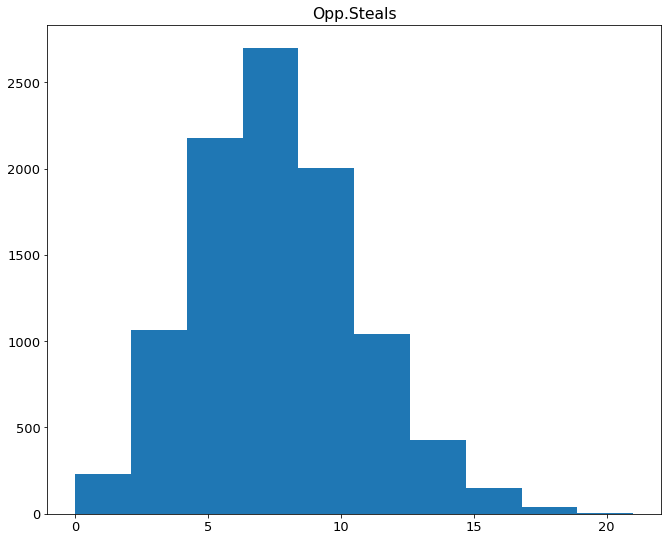

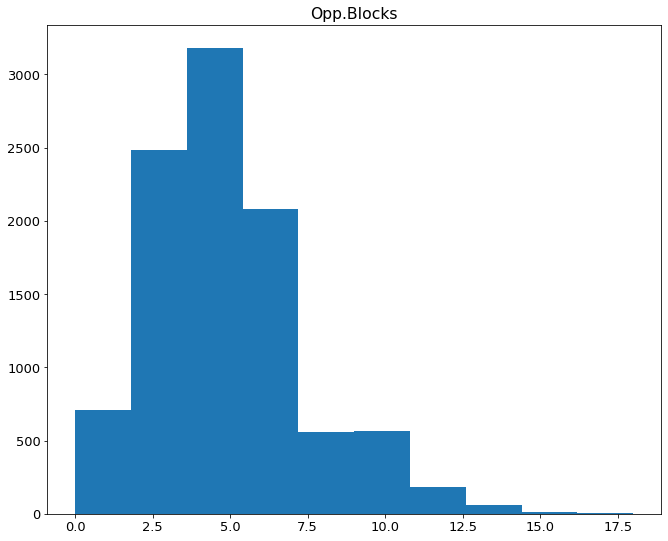

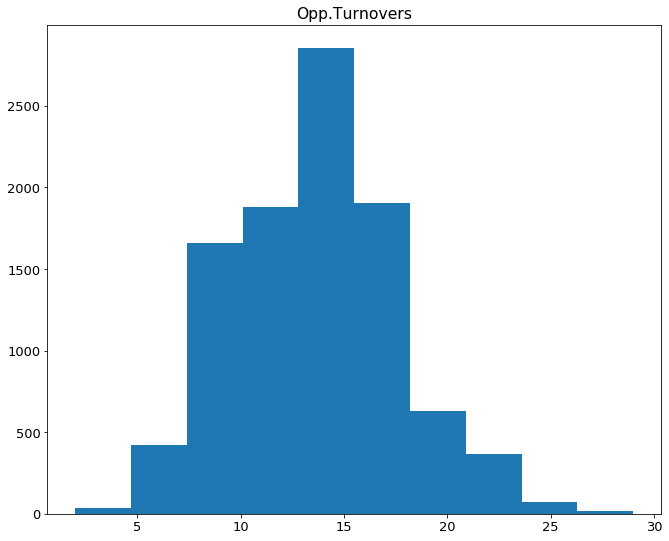

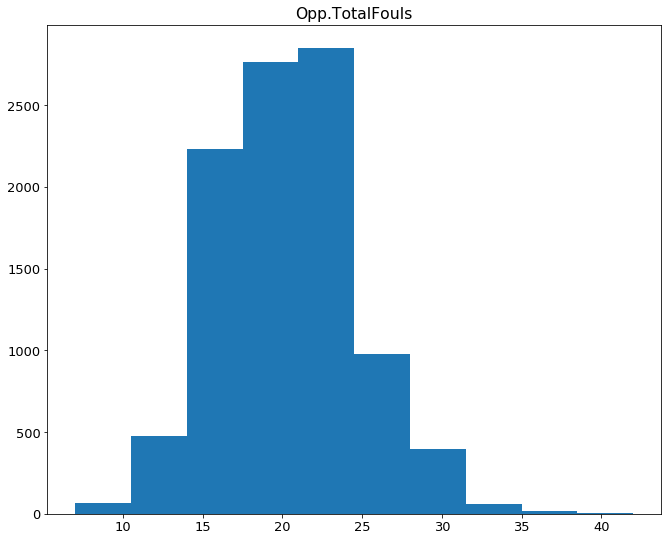

,team,game,date,home,opponent,winorloss,teampoints,opponentpoints,fieldgoals,fieldgoalsattempted,...,opp.freethrows,opp.freethrowsattempted,opp_freethrows_pct,opp.offrebounds,opp.totalrebounds,opp.assists,opp.steals,opp.blocks,opp.turnovers,opp.totalfouls
0,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,...,27,33,0.818,16,48,26,13,9,9,22
1,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,...,18,21,0.857,11,44,25,5,5,18,26
2,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,...,27,38,0.711,11,50,25,7,9,19,15
3,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,...,20,27,0.741,11,51,31,6,7,19,30
4,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,...,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,WAS,78,2018-04-03,Away,HOU,L,104,120,38,72,...,18,27,0.667,10,46,26,13,3,9,14
9836,WAS,79,2018-04-05,Away,CLE,L,115,119,47,94,...,22,28,0.786,5,35,26,10,3,16,14
9837,WAS,80,2018-04-06,Home,ATL,L,97,103,35,87,...,16,23,0.696,7,50,24,5,5,18,22
9838,WAS,81,2018-04-10,Home,BOS,W,113,101,41,83,...,22,27,0.815,13,44,22,14,1,16,18


In [71]:
prepare_nba(nba_df)

In [72]:
df.head()

,team,game,date,home,opponent,winorloss,teampoints,opponentpoints,fieldgoals,fieldgoalsattempted,...,opp.freethrows,opp.freethrowsattempted,opp_freethrows_pct,opp.offrebounds,opp.totalrebounds,opp.assists,opp.steals,opp.blocks,opp.turnovers,opp.totalfouls
0,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,...,27,33,0.818,16,48,26,13,9,9,22
1,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,...,18,21,0.857,11,44,25,5,5,18,26
2,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,...,27,38,0.711,11,50,25,7,9,19,15
3,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,...,20,27,0.741,11,51,31,6,7,19,30
4,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,...,8,11,0.727,13,44,26,2,6,15,29
